<a href="https://colab.research.google.com/github/RenanProjetos/FiqueEmCasaConf/blob/master/ArtigoCientifico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Programa para predição de valores da bolsa usando machne learning
# Instalando as Dependências

# import quandl # Disponibiliza dados do sistema de séries temporais
import numpy as np # Realiza cálculos em Arrays Multidimensionais.-(Usado no Modelo Machine Learning)
import pandas_datareader as web
import pandas as pd 
from sklearn.linear_model import LinearRegression # Se ajusta a um modelo Linear,para minimizar a soma residual dos quadrados entre os alvos observados no conjunto de dados e os alvos previstos pela aproximação linear.
from sklearn.svm import SVR # Classificação de Vetores
from sklearn.model_selection import train_test_split # Divide arrays e matrizes em subconjuntos aleatórios para teste,inserire dados em uma única chamada para dividir (com opção de subamostrar).
import matplotlib.pyplot as plt # Biblioteca para Gráficos
plt.style.use('fivethirtyeight') # Estilo Padrão para Trabalhos Acadêmicos

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [78]:
# Pegando os dados das Ações
#Facebook, utilizando a API key registrada no quandl
# df = quandl.get("NASDAQOMX/XQC", api_key='uNowRc9u3vFRYiom7vjz') 
# quandl.ApiConfig.api_key = 'uNowRc9u3vFRYiom7vjz'
# df = quandl.get("NASDAQOMX/NQBR6000GBPT",start_date='2020-01-01', end_date='2020-06-01')
#Brasil Telecon
#Visualizando os Dados
df = web.DataReader("BBD", data_source='yahoo', start= '2005-01-01', end= '2020-06-01') # BANCO BRADESCO = BBD
print(df.head())

                High       Low      Open     Close      Volume  Adj Close
Date                                                                     
2005-01-03  2.645254  2.585775  2.618123  2.589949   1616500.0   1.103178
2005-01-04  2.634819  2.450121  2.614993  2.451164   5977800.0   1.044063
2005-01-05  2.502296  2.416729  2.473078  2.431338  10038200.0   1.035618
2005-01-06  2.443860  2.348902  2.432382  2.348902   2949400.0   1.000505
2005-01-07  2.410468  2.338467  2.374990  2.387511   2826900.0   1.016949


            Adj Close
Date                 
2005-01-03   1.103178
2005-01-04   1.044063
2005-01-05   1.035618
2005-01-06   1.000505
2005-01-07   1.016949


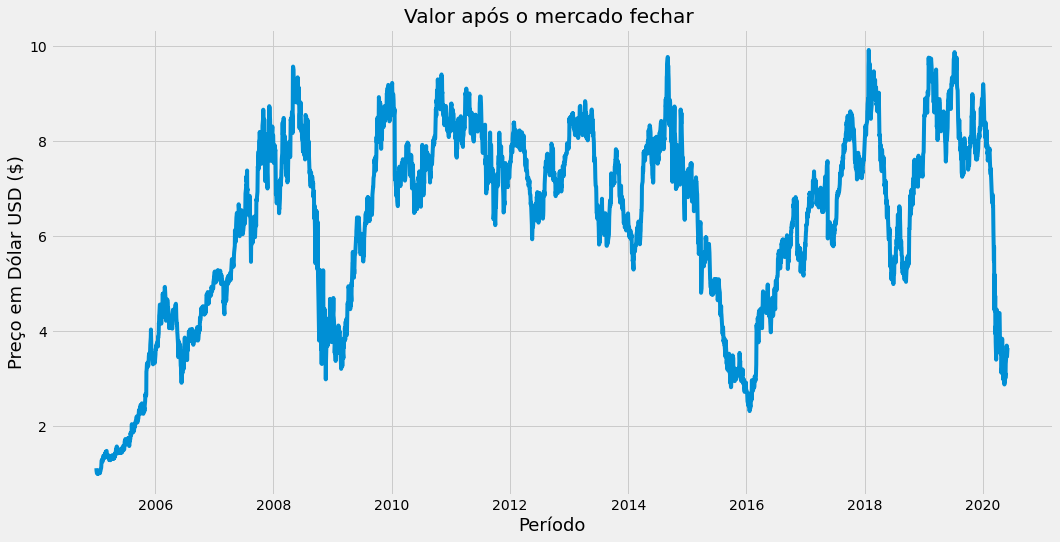

In [79]:
# Pegando o valor ajustado após o mercado de ações fechar
df = df[['Adj Close']] # Valor da Ação Após o Mercado Fechar
#Observando os Novos Dados
print(df.head())
# Fazendo o Gráfico
plt.figure(figsize=(16,8))
plt.title('Valor após o mercado fechar ')
plt.plot(df['Adj Close'])
plt.xlabel('Período', fontsize=18)
plt.ylabel('Preço em Dólar USD ($)', fontsize=18)
plt.show()

In [80]:
# Variavel para predição de 'x' dias 
forecast_out = 30
# Criação de outra coluna (Variavel Alvo = variável cujos valores devem ser modelados e previstos por outras variáveis.)
# Deslocando 'x' unidades para cima
df['Predição'] = df[['Adj Close']].shift(-forecast_out)
# Mostrando o novo Data Set = Conjunto de Dados
print(df.tail())

            Adj Close  Predição
Date                           
2020-05-26   3.576724       NaN
2020-05-27   3.686623       NaN
2020-05-28   3.556742       NaN
2020-05-29   3.456834       NaN
2020-06-01   3.636669       NaN


In [81]:
## Criando um Data Set Indiferente (y) ##
# Convertendo o DataFrame = Tabela da Base de Dados para um Numpy Array = Todos os elemento são do mesmo Tipo #
y = np.array(df.drop(['Predição'],1)) # Lista da lista, lista = ['Adj. Close']
# Removendo a ultima linha da variável 'x = dias' previstos
y = y[:-forecast_out]
print(y)

[[1.10317814]
 [1.04406297]
 [1.03561831]
 ...
 [3.89189458]
 [3.76216459]
 [3.84199834]]


In [82]:
# Criando um conjunto de dados dependente (dep) #
# Convertendo o Dataframe = Tabela da Base de Dados para um Numpy Array = elementos do mesmo tipo,
# Incluindo todos os valores e os NaN = predições
dep = np.array(df['Predição'])
# Pegando todos os 'dep' valores exceto as linhas = 'x'
dep = dep[:-forecast_out]
print(dep)

[1.36386526 1.35719228 1.35229874 ... 3.55674219 3.45683384 3.63666916]


In [0]:
# Agora que temos 2 datasets, aconteçe a divisão dos mesmos em em 80% treinamento e 20% teste
x_train, x_test, y_train, y_test = train_test_split(y, dep, test_size=0.2)

In [84]:
# Criando e treinando o suporte da maquina de vetores (Regressor)
# regressão e uma técnica que permite explorar e inferir a relação de uma variável dependente com variáveis independentes
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [85]:
# Testando o modelo: Percentual gerado que Retorna os valres do coeficiente de determinação = R^2 da Predição
# O melhor percentual possivel é 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm_confidence: ", svm_confidence)

svm_confidence:  0.8471237637668638


In [86]:
# Criando e Treinando um Modelo de Regressão Linear
lin = LinearRegression()
# Treinando o Modelo
lin.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
# Testando o modelo Linear
lin_confidence = lin.score(x_test, y_test)
print("lin_confidence: ", lin_confidence)

lin_confidence:  0.8345025516224708


In [88]:
# Vetor linear foi Melhor que o Vetor de Suporte 
# Inserindo as ultimas 30 Linhas no 'x_forecast' do dataset orginal (Colunas de Adj. Close)
x_forecast = np.array(df.drop(['Predição'],1))[-forecast_out:]
print(x_forecast)


[[3.66237259]
 [3.51268411]
 [3.59251761]
 [3.47276735]
 [3.11351538]
 [3.23326612]
 [3.59251761]
 [3.83201909]
 [3.51268411]
 [3.32307911]
 [3.30312037]
 [3.26320386]
 [3.14345336]
 [2.96382713]
 [3.17708993]
 [3.04720879]
 [2.91732788]
 [2.86737347]
 [3.03721809]
 [2.93730974]
 [3.10715389]
 [2.99725461]
 [3.08717227]
 [3.30697083]
 [3.34693432]
 [3.57672381]
 [3.68662333]
 [3.55674219]
 [3.45683384]
 [3.63666916]]


In [89]:
# Mostrando o Modelo de Regressão Linear
# Mostrando na tela as predições nos proximos 'x' dias
lin_prediction = lin.predict(x_forecast)
print(lin_prediction)

# Mostrando o vetor de suporte regressor de predição dos proximos 'x' dias
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[4.02413598 3.89291079 3.96289725 3.85791757 3.54297746 3.64795756
 3.96289725 4.17285746 3.89291079 3.72669259 3.70919566 3.67420264
 3.56922275 3.41175249 3.59871042 3.48484944 3.37098868 3.32719588
 3.47609105 3.38850588 3.53740063 3.44105686 3.51988364 3.71257119
 3.74760538 3.94905154 4.04539552 3.93153454 3.84394937 4.00160293]
[3.80970086 3.72385049 3.76776035 3.70327095 3.53731597 3.59161154
 3.76776035 3.9278928  3.72385049 3.63196963 3.62292813 3.60499706
 3.55112724 3.46307883 3.56640951 3.50570224 3.43747399 3.40818844
 3.5007851  3.44865943 3.53434954 3.48062425 3.52494811 3.6246675
 3.64287433 3.75875416 3.82511912 3.74759373 3.69527795 3.79385374]


In [0]:
# dia 02/06/2020 as ações ficaram em 3.9700. com isso pode-se inferir que o vetor de suporte saiu-se um pouco a frente
# só lembrando que o suport ficou com um rate de 0.84 e o linear com 0.83